A continuación se presentan los pasos para un análisis exploratorio y de limpieza de Datos

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timezone
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
df_udemy = pd.read_csv("./Moocs/udemy_courses.csv")

1. Observación de las caracteristicas del Data frame (cálculo de nulos y eliminación de duplicados)

In [49]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [50]:
df_udemy.drop_duplicates(inplace=True)

Text(0.5, 1.0, 'Porcentaje de nulos por columna')

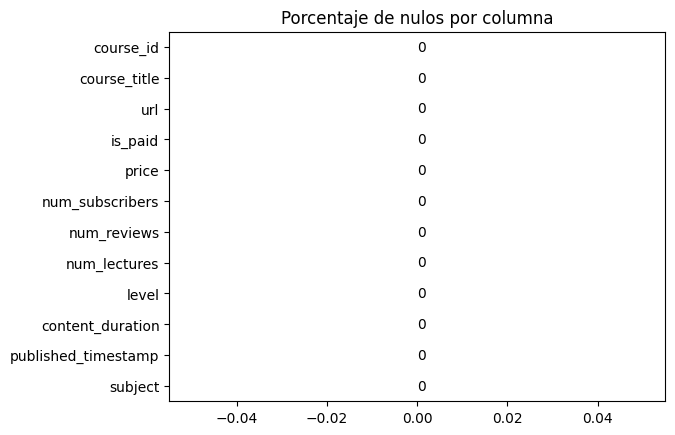

In [51]:
# se observan porcentajes de nulos 
ax = sns.barplot(x = ((df_udemy.isnull().sum()*100/df_udemy.shape[0])).values, y = df_udemy.columns)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de nulos por columna')

In [52]:
# Se normalizan las columnas de tipo texto en minuscula
columns= df_udemy.select_dtypes(include="object")
for i in columns:
    df_udemy[i] = df_udemy[i].str.lower()

2. Se hace transformación de la columna Date

In [53]:
df_udemy["year"] = df_udemy["published_timestamp"].apply(lambda n : pd.to_datetime(n).year)
df_udemy["month"] = df_udemy["published_timestamp"].apply(lambda n : pd.to_datetime(n).month)
df_udemy["day"] = df_udemy["published_timestamp"].apply(lambda n : pd.to_datetime(n).day)
df_udemy['published_date'] = pd.to_datetime(df_udemy.year.astype(str) + '/' + df_udemy.month.astype(str) + '/' + df_udemy.day.astype(str))

3. Se codifica la columna is_paid y se crea una columna categorica nueva con valores de 1 y 0

<AxesSubplot:xlabel='is_paid', ylabel='count'>

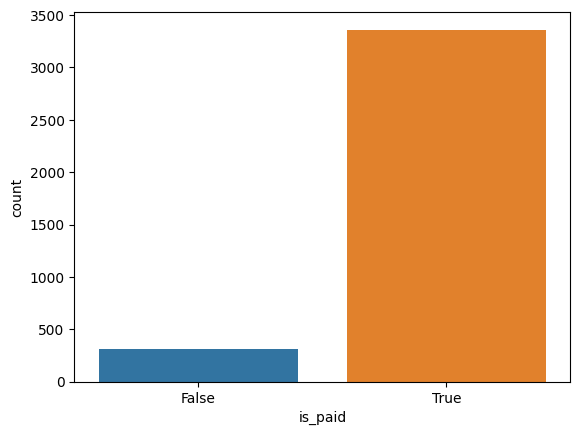

In [54]:
# Asignando valores númericos para crear nueva columa categorica
paid_dict={True:1,
        False:0}
df_udemy["is_paid_c"]=df_udemy["is_paid"].map(paid_dict)
# se observa la distribución muestral en estas categorias
sns.countplot(data=df_udemy, x="is_paid")

4. Limpieza columna Precio

count    3672.000000
mean       66.102941
std        61.035920
min         0.000000
25%        20.000000
50%        45.000000
75%        95.000000
max       200.000000
Name: price, dtype: float64

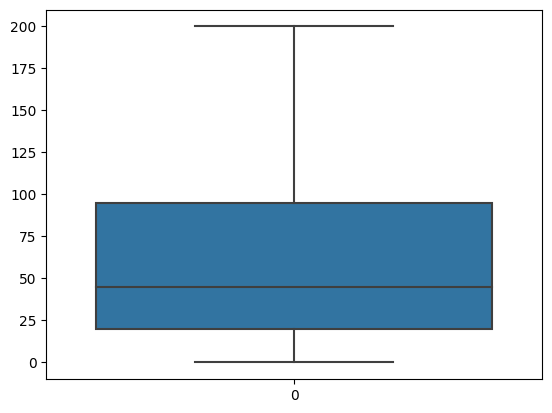

In [55]:
sns.boxplot(df_udemy["price"])
df_udemy["price"].describe()

<AxesSubplot:xlabel='price', ylabel='count'>

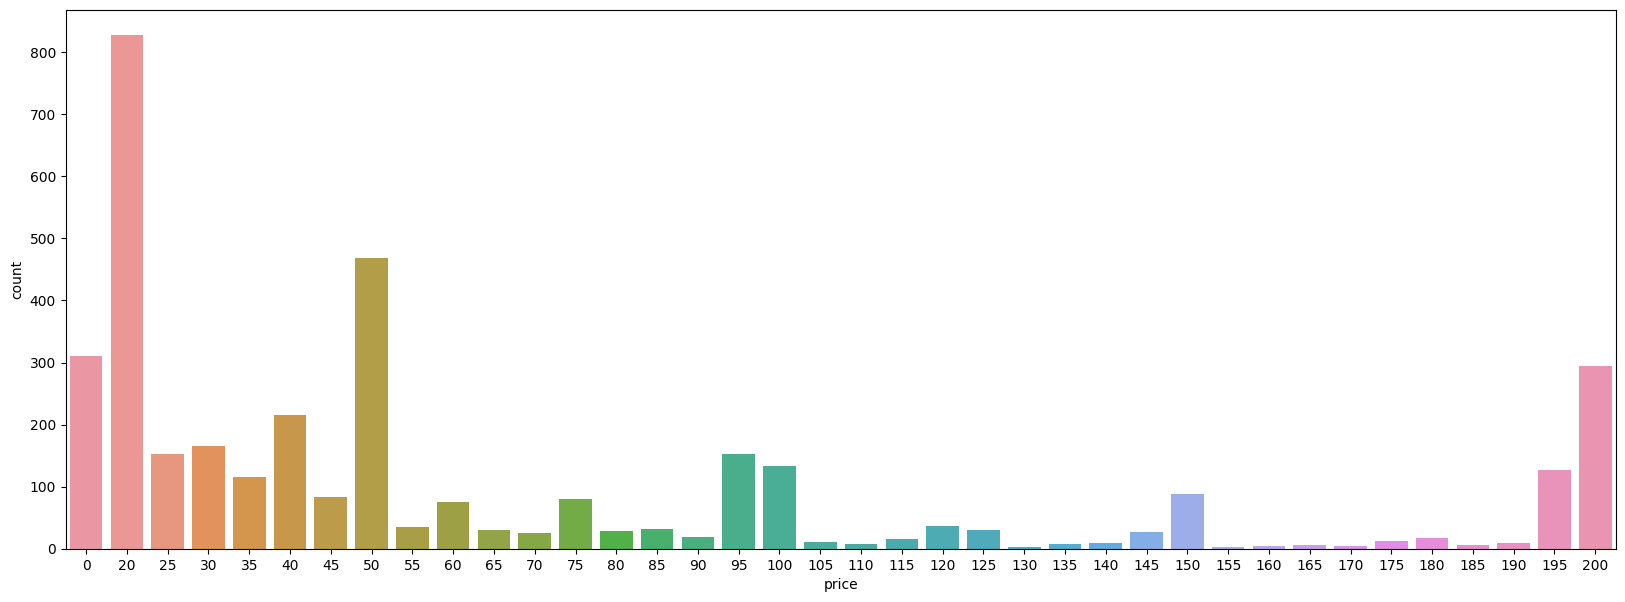

In [56]:
plt.figure(figsize=(20,7))
sns.countplot(data=df_udemy, x="price")

In [57]:
# se hace una division en 3 categorias de precio garantizando un numero equitativo de observaciones por cada categoria
df_udemy['priceBins'] =  pd.qcut(df_udemy['price'], 3)
#Generar 3 categorias bajo[0-25] medio {25-60} alto[60-200]
df_udemy['price_c'] = pd.cut(df_udemy['price'], bins=[float('-Inf'), 24, 59, float('Inf')], labels=['low', 'medium', 'high'])

<AxesSubplot:xlabel='price_c', ylabel='count'>

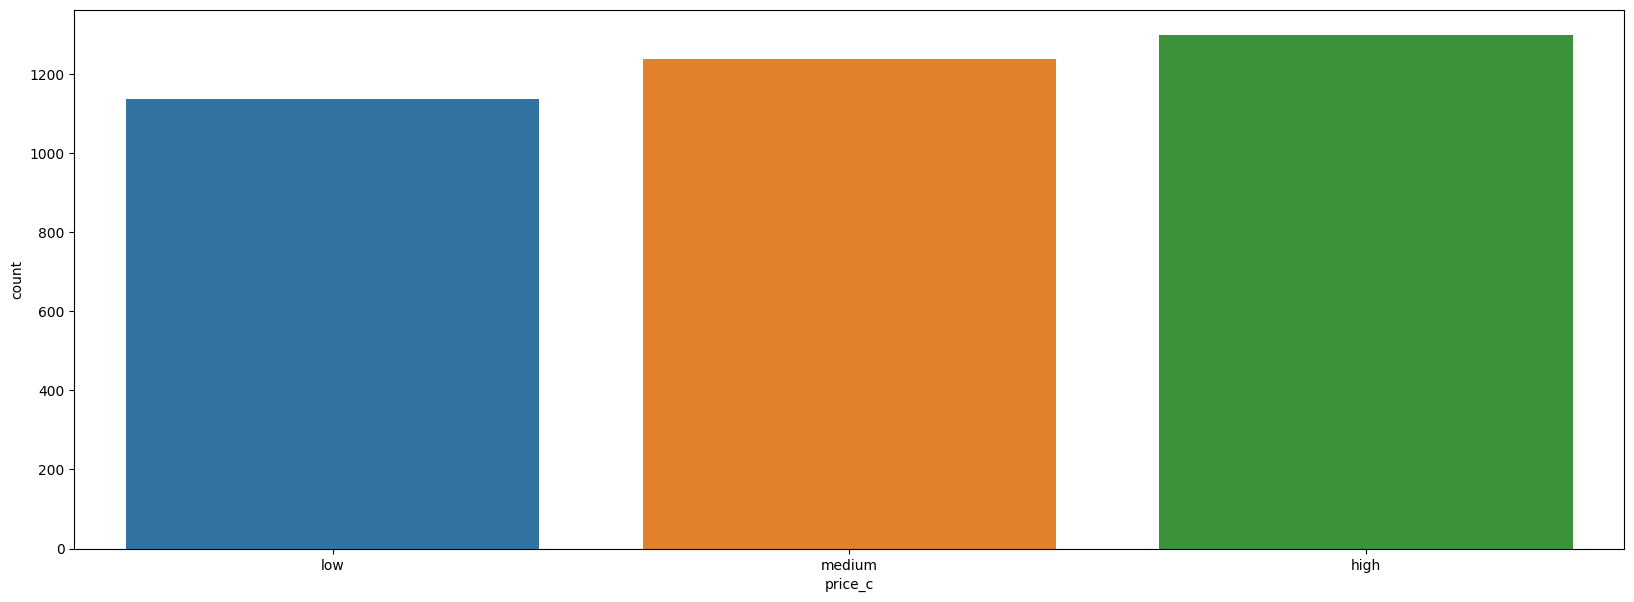

In [58]:
# Se verifica la distribución muestral de las categorias precio
plt.figure(figsize=(20,7))
sns.countplot(data=df_udemy, x="price_c")

5. Manipulación columna levels - se renombran

<AxesSubplot:xlabel='level', ylabel='count'>

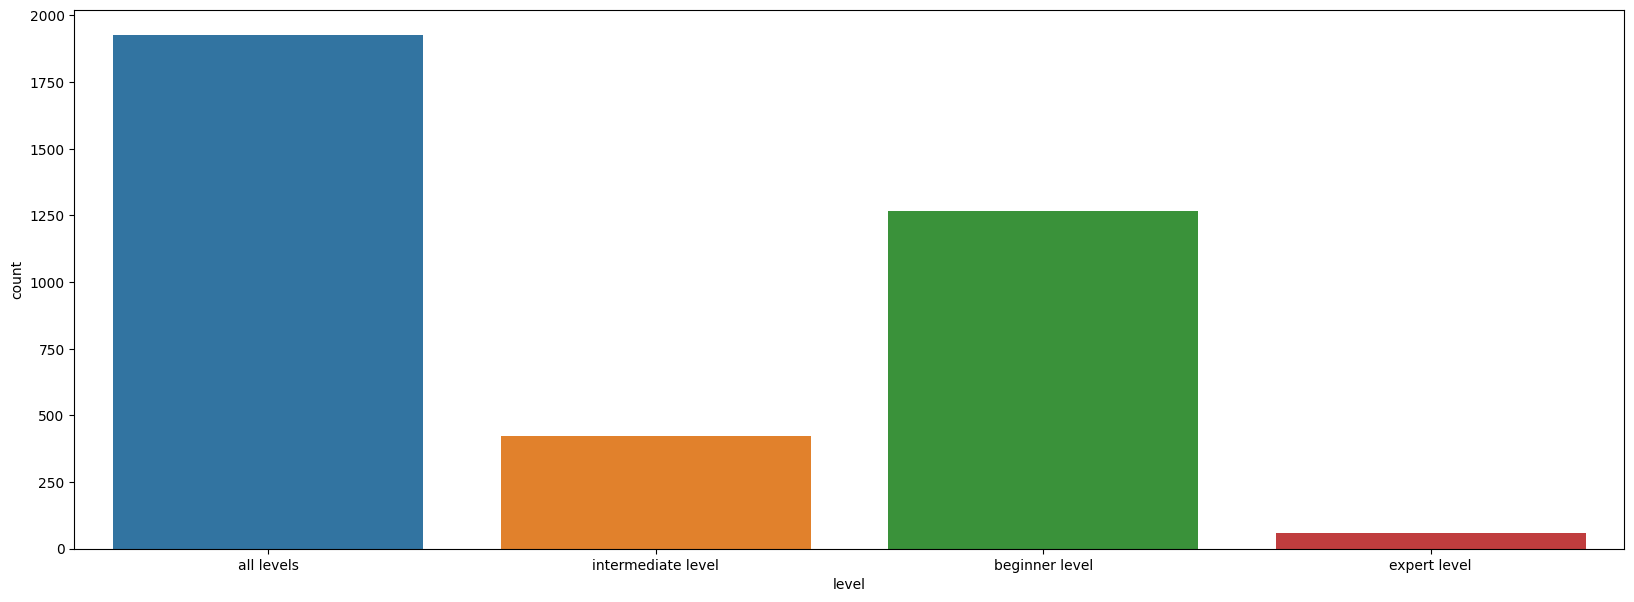

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))
sns.countplot(data=df_udemy, x="level")

In [60]:
#Rename columns
rename_dict = {"all levels":"all",
                "intermediate level": "intermediate",
                "beginner level":"introductory",
                "expert level":"advance"}

df_udemy["level_new"]=df_udemy["level"].map(rename_dict)

df_udemy.drop("level", axis=1, inplace=True)
df_udemy.rename(columns={"level_new": "level"})

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,published_timestamp,subject,year,month,day,published_date,is_paid_c,priceBins,price_c,level
0,1070968,ultimate investment banking course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,1.5,2017-01-18t20:58:58z,business finance,2017,1,18,2017-01-18,1,"(60.0, 200.0]",high,all
1,1113822,complete gst course & certification - grow you...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,39.0,2017-03-09t16:34:20z,business finance,2017,3,9,2017-03-09,1,"(60.0, 200.0]",high,all
2,1006314,financial modeling for business analysts and c...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,2.5,2016-12-19t19:26:30z,business finance,2016,12,19,2016-12-19,1,"(25.0, 60.0]",medium,intermediate
3,1210588,beginner to pro - financial analysis in excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,3.0,2017-05-30t20:07:24z,business finance,2017,5,30,2017-05-30,1,"(60.0, 200.0]",high,all
4,1011058,how to maximize your profits trading options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,2.0,2016-12-13t14:57:18z,business finance,2016,12,13,2016-12-13,1,"(60.0, 200.0]",high,intermediate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,learn jquery from scratch - master of javascri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,2.0,2016-06-14t17:36:46z,web development,2016,6,14,2016-06-14,1,"(60.0, 200.0]",high,all
3674,1088178,how to design a wordpress website with no codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,3.5,2017-03-10t22:24:30z,web development,2017,3,10,2017-03-10,1,"(-0.001, 25.0]",medium,introductory
3675,635248,learn and build using polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,3.5,2015-12-30t16:41:42z,web development,2015,12,30,2015-12-30,1,"(25.0, 60.0]",medium,all
3676,905096,css animations: create amazing effects on your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,3.0,2016-08-11t19:06:15z,web development,2016,8,11,2016-08-11,1,"(25.0, 60.0]",medium,all


6. Manipulación columna subject

In [61]:
# se observa que hay 4 únicas categorias en el data-set para esta columna
df_udemy["subject"].value_counts()

web development        1199
business finance       1191
musical instruments     680
graphic design          602
Name: subject, dtype: int64

7. Manipulación columna subscribers - detección de outliers

<AxesSubplot:>

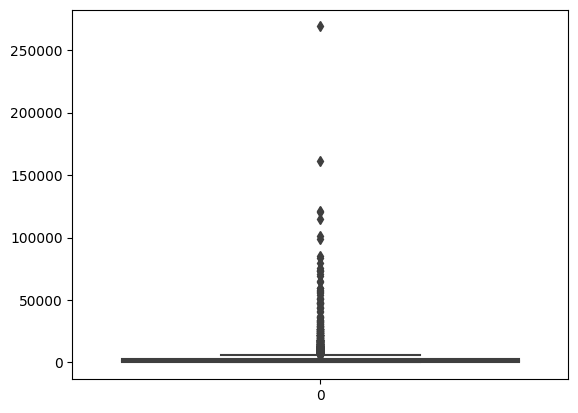

In [62]:
#Num_subscribers_outliers
df_udemy["num_subscribers"].astype(int)
df_udemy["num_subscribers"].describe()
#Columna nro_subscribers
sns.boxplot(df_udemy["num_subscribers"])

In [63]:
#Para los outliers se decide asignarles un valor igual a la cota 
#superior (75%) para el numero de personas registradas según subject - tematica
stats_subscrib = df_udemy.groupby(["subject"])["num_subscribers"].describe()
subject_max_dict = round(stats_subscrib["75%"],0).to_dict()
#assign outliers to 75% num subscribers
df_udemy["num_subscribers"]= np.where(df_udemy["num_subscribers"] > df_udemy["subject"].map(subject_max_dict),df_udemy["subject"].map(subject_max_dict),df_udemy["num_subscribers"])

<AxesSubplot:>

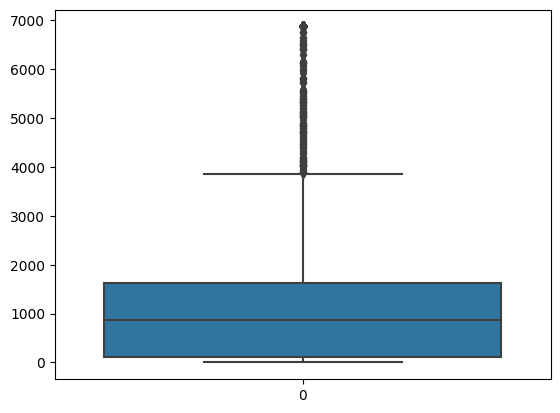

In [64]:
#Columna nro_subscribers
sns.boxplot(df_udemy["num_subscribers"])

--------------------------------------------------------------------------------------------------

<AxesSubplot:xlabel='year', ylabel='num_reviews'>

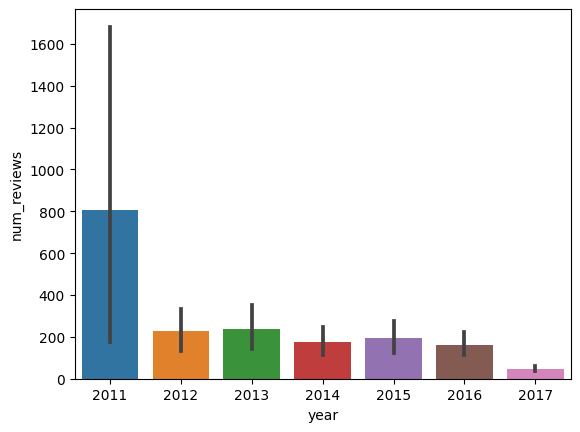

In [65]:
#Nro reviews
sns.barplot(df_udemy, x= df_udemy["year"], y=df_udemy["num_reviews"])

<AxesSubplot:xlabel='year', ylabel='num_subscribers'>

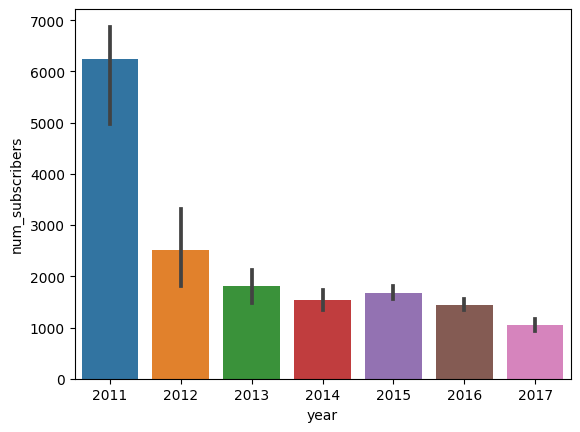

In [66]:
sns.barplot(df_udemy, x= df_udemy["year"], y=df_udemy["num_subscribers"])

<AxesSubplot:xlabel='year', ylabel='num_lectures'>

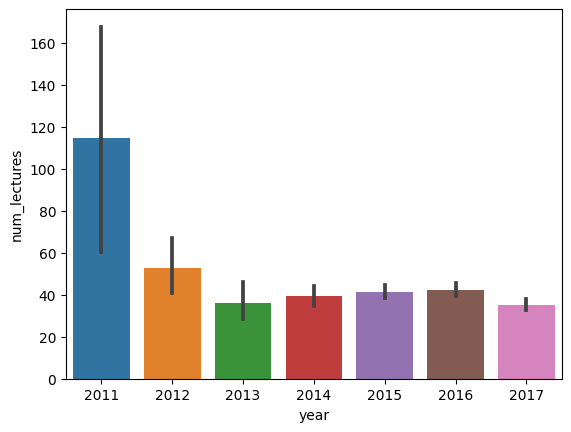

In [67]:
sns.barplot(df_udemy, x= df_udemy["year"], y=df_udemy["num_lectures"])


In [68]:
# --- NUEVA COLUMNA SALES
df_udemy["price"].astype("float")
df_udemy["num_subscribers"].astype("float")
df_udemy["sales"]= df_udemy["num_subscribers"]*df_udemy["price"]*df_udemy["is_paid_c"]

In [69]:
# -- NUEVA COLUMNA INDEX-ENGAGEMENT
df_udemy["engage_index"] = df_udemy[["num_reviews","num_subscribers"]].apply(lambda x: x["num_reviews"] / x["num_subscribers"] if x["num_subscribers"] != 0 else x["num_subscribers"], axis=1)
df_udemy["engage_index"] = df_udemy[["engage_index"]].apply(lambda x: 1 if x["engage_index"] > 1 else x["engage_index"], axis=1)

<AxesSubplot:xlabel='year', ylabel='engage_index'>

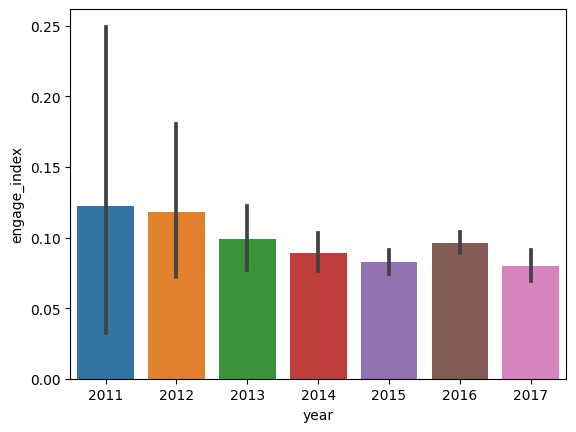

In [70]:
sns.barplot(df_udemy, x= df_udemy["year"], y=df_udemy["engage_index"])

In [71]:

df_udemy.drop(columns=["course_id","url","published_timestamp"],inplace=True)

In [72]:
unique_title = df_udemy["course_title"].unique
print(unique_title)

<bound method Series.unique of 0                      ultimate investment banking course
1       complete gst course & certification - grow you...
2       financial modeling for business analysts and c...
3       beginner to pro - financial analysis in excel ...
4            how to maximize your profits trading options
                              ...                        
3673    learn jquery from scratch - master of javascri...
3674    how to design a wordpress website with no codi...
3675                        learn and build using polymer
3676    css animations: create amazing effects on your...
3677    using modx cms to build websites: a beginner's...
Name: course_title, Length: 3672, dtype: object>


In [73]:
df_udemy["course_title"].value_counts()

# Replace all non letter characters with a whitespace
def clean_values(series, to_replace, value, regex = True):
    for i in to_replace:
        series = series.str.replace(i, value, regex=regex)
    return series

pattern = [';',',','.',':','!','&','#','#','$','"',"'","-"]


df_udemy["course_title"] = clean_values(df_udemy["course_title"],pattern,value=' ',regex = True)
#strip method
df_udemy["course_title"]=df_udemy["course_title"].str.strip()
#Ubicar withespaces
df_udemy["course_title"] = df_udemy["course_title"].str.replace(r'\s+',' ',regex=True)

There are 166048 words in the combination of all review.


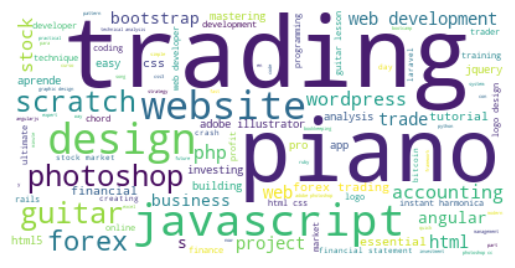

In [74]:
course_title = " ".join(course_title for course_title in df_udemy.course_title)
print ("There are {} words in the combination of all review.".format(len(course_title)))
stopwords = set(STOPWORDS)
stopwords.update(["basic", "learn", "fundamental", "international", 
                 "fundamentals","introduction","intro","uva darden","uva",
                 "darden","principles","foundation","foundations","learning","big",
                 "everyday","tools","guide","course","play","basics","professional",
                 "complete","create","beginner","advance","using","option","master",
                 "de","level","step","advanced","advance","make","build","beginners","become",
                 "options","start","hour"])


# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords,max_font_size=80, max_words=100,background_color="white").generate(course_title)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("./img_udemy.png")

In [75]:
df_udemy.to_csv("udemy.csv")